In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
Data=pd.read_csv('/kaggle/input/mobile-phone-price/Mobile phone price.csv')

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [4]:
Data["Screen Size (inches)"].unique()

array(['6.1', '6.8', '6.7', '6.67', '6.4', '6.55', '6.78', '6.43', '6.5',
       '6.62', '5.4', '6.2', '6.51', '6.6', '4.7', '6.58', '6.52', '6.44',
       '6.53', '6.56', '6.8 + 3.9', '4.5', '6.39', '5.9', '5.5', '6.81',
       '5.99', '6.82', '6.3', '6.22', '6', '6.35', '6.9', '6.76', '6.49',
       '6.72', '5.7', '6.47', '7.6 (unfolded)', '6.15', '6.57'],
      dtype=object)

In [5]:
Data.columns = Data.columns.str.strip() 
Data.columns=Data.columns.str.replace(" ","")
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Brand                 407 non-null    object
 1   Model                 407 non-null    object
 2   Storage               407 non-null    object
 3   RAM                   407 non-null    object
 4   ScreenSize(inches)    407 non-null    object
 5   Camera(MP)            407 non-null    object
 6   BatteryCapacity(mAh)  407 non-null    int64 
 7   Price($)              407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [6]:
Data

,Brand,Model,Storage,RAM,ScreenSize(inches),Camera(MP),BatteryCapacity(mAh),Price($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429


In [7]:
Data["Storage"]=Data["Storage"].str.strip()
Data["Storage"]=Data["Storage"].str.replace("GB","")
Data["Storage"]


0      128 
1      256 
2      128 
3      128 
4      128 
       ... 
402     128
403     128
404     128
405     128
406     128
Name: Storage, Length: 407, dtype: object

In [8]:
Data["RAM"]=Data["RAM"].str.strip()
Data["RAM"]=Data["RAM"].str.replace("GB","")
Data["RAM"]

0       6 
1      12 
2       8 
3       6 
4       8 
      ... 
402      8
403      6
404      6
405      8
406      6
Name: RAM, Length: 407, dtype: object

In [9]:
Data["ScreenSize(inches)"]=Data["ScreenSize(inches)"].str.replace("","")

In [10]:
import re
Data["ScreenSize(inches)"]=Data["ScreenSize(inches)"].str.strip()
Data["ScreenSize(inches)"].unique()
Data["ScreenSize(inches)"]=Data["ScreenSize(inches)"].str.replace("unfolded","")
Data["ScreenSize(inches)"]=Data["ScreenSize(inches)"].str.replace("()","")
def extract_numeric_screen_size(size_str):
    numeric_values = re.findall(r'\d+\.*\d*', size_str)
    return float(numeric_values[0]) if numeric_values else None
Data['ScreenSize(inches)'] = Data['ScreenSize(inches)'].apply(extract_numeric_screen_size)
Data['ScreenSize(inches)']

/tmp/ipykernel_20/743479457.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  Data["ScreenSize(inches)"]=Data["ScreenSize(inches)"].str.replace("()","")


0      6.10
1      6.80
2      6.70
3      6.67
4      6.40
       ... 
402    6.70
403    6.57
404    6.70
405    6.40
406    6.70
Name: ScreenSize(inches), Length: 407, dtype: float64

In [11]:
print(Data["ScreenSize(inches)"].unique())

[6.1  6.8  6.7  6.67 6.4  6.55 6.78 6.43 6.5  6.62 5.4  6.2  6.51 6.6
 4.7  6.58 6.52 6.44 6.53 6.56 4.5  6.39 5.9  5.5  6.81 5.99 6.82 6.3
 6.22 6.   6.35 6.9  6.76 6.49 6.72 5.7  6.47 7.6  6.15 6.57]


In [12]:
Data["Camera(MP)"].unique()
Data["Camera(MP)"]=Data["Camera(MP)"].str.replace("MP","")
def extract_numeric_screen_size(size_str):
    numeric_values = re.findall(r'\d+\.*\d*', size_str)
    return float(numeric_values[0]) if numeric_values else None
Data['Camera(MP)'] = Data['Camera(MP)'].apply(extract_numeric_screen_size)
Data['Camera(MP)'] 

0       12.0
1      108.0
2       48.0
3       64.0
4       50.0
       ...  
402     12.0
403     48.0
404     12.0
405     48.0
406     48.0
Name: Camera(MP), Length: 407, dtype: float64

In [13]:
Data["Price($)"]=Data["Price($)"].str.replace("$","")

/tmp/ipykernel_20/464969199.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Data["Price($)"]=Data["Price($)"].str.replace("$","")


In [14]:
 Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 407 non-null    object 
 1   Model                 407 non-null    object 
 2   Storage               407 non-null    object 
 3   RAM                   407 non-null    object 
 4   ScreenSize(inches)    407 non-null    float64
 5   Camera(MP)            407 non-null    float64
 6   BatteryCapacity(mAh)  407 non-null    int64  
 7   Price($)              407 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 25.6+ KB


In [15]:
Data["Brand"] = Data["Brand"].astype("category")
Data["Brand"] = Data["Brand"].cat.codes
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 407 non-null    int8   
 1   Model                 407 non-null    object 
 2   Storage               407 non-null    object 
 3   RAM                   407 non-null    object 
 4   ScreenSize(inches)    407 non-null    float64
 5   Camera(MP)            407 non-null    float64
 6   BatteryCapacity(mAh)  407 non-null    int64  
 7   Price($)              407 non-null    object 
dtypes: float64(2), int64(1), int8(1), object(4)
memory usage: 22.8+ KB


In [16]:
Data["Model"] = Data["Model"].astype("category")
Data["Model"] = Data["Model"].cat.codes
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 407 non-null    int8   
 1   Model                 407 non-null    int16  
 2   Storage               407 non-null    object 
 3   RAM                   407 non-null    object 
 4   ScreenSize(inches)    407 non-null    float64
 5   Camera(MP)            407 non-null    float64
 6   BatteryCapacity(mAh)  407 non-null    int64  
 7   Price($)              407 non-null    object 
dtypes: float64(2), int16(1), int64(1), int8(1), object(3)
memory usage: 20.4+ KB


In [17]:
Data

,Brand,Model,Storage,RAM,ScreenSize(inches),Camera(MP),BatteryCapacity(mAh),Price($)
0,0,232,128,6,6.10,12.0,3095,999
1,12,100,256,12,6.80,108.0,5000,1199
2,9,19,128,8,6.70,48.0,4500,899
3,15,178,128,6,6.67,64.0,5020,279
4,4,162,128,8,6.40,50.0,4614,799
...,...,...,...,...,...,...,...,...
402,12,95,128,8,6.70,12.0,4300,1049
403,15,111,128,6,6.57,48.0,4160,349
404,0,229,128,6,6.70,12.0,3687,1099
405,10,188,128,8,6.40,48.0,4025,429


In [18]:
Data["Storage"] = Data["Storage"].astype("float")
Data["RAM"] = Data["RAM"].astype("float")
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 407 non-null    int8   
 1   Model                 407 non-null    int16  
 2   Storage               407 non-null    float64
 3   RAM                   407 non-null    float64
 4   ScreenSize(inches)    407 non-null    float64
 5   Camera(MP)            407 non-null    float64
 6   BatteryCapacity(mAh)  407 non-null    int64  
 7   Price($)              407 non-null    object 
dtypes: float64(4), int16(1), int64(1), int8(1), object(1)
memory usage: 20.4+ KB


In [19]:
Data

,Brand,Model,Storage,RAM,ScreenSize(inches),Camera(MP),BatteryCapacity(mAh),Price($)
0,0,232,128.0,6.0,6.10,12.0,3095,999
1,12,100,256.0,12.0,6.80,108.0,5000,1199
2,9,19,128.0,8.0,6.70,48.0,4500,899
3,15,178,128.0,6.0,6.67,64.0,5020,279
4,4,162,128.0,8.0,6.40,50.0,4614,799
...,...,...,...,...,...,...,...,...
402,12,95,128.0,8.0,6.70,12.0,4300,1049
403,15,111,128.0,6.0,6.57,48.0,4160,349
404,0,229,128.0,6.0,6.70,12.0,3687,1099
405,10,188,128.0,8.0,6.40,48.0,4025,429


In [20]:
Data["Price($)"] = Data["Price($)"].str.replace("'", "").str.replace(",", "").str.strip().astype(int)


In [21]:
Data["Price($)"].unique()

array([ 999, 1199,  899,  279,  799,  249,  699,  329,  449,  199,  299,
        379,  179,  729,  599,  139,  189,  399,  259,  159,  229,  499,
        129,  529,  369, 1099,  169,   99,  459,  239, 1299,  429,  659,
        269,  359,  549,  319,  349,  969,  149,  219,  109,  389,  309,
        849,  469,  209,  119,  339,  289,  130,  749,  649,  419, 1399,
       1999, 1049])

<Axes: xlabel='Price($)'>

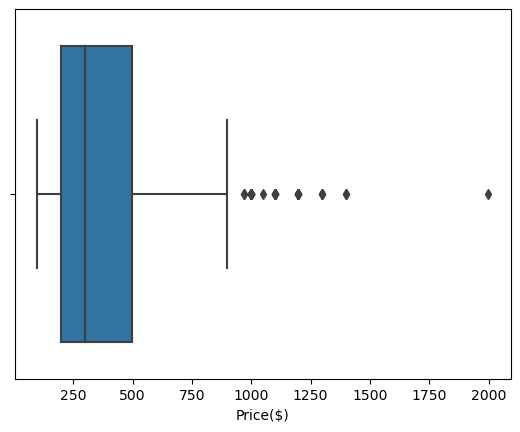

In [22]:
sns.boxplot(x=Data["Price($)"])

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
x= Data.iloc[:, :-1]
y=Data["Price($)"]
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)





Mean Squared Error: 18415.521383447507


In [24]:
reg.score(X_train,y_train)


0.744603704963331

In [25]:
reg.score(X_test , y_test)

0.7829430008272532

In [26]:
reg.coef_

array([-2.31031669e+01,  3.14463154e-01,  1.68606227e+00,  5.34960463e+01,
        1.84229630e+02, -1.30849544e+00, -8.36055006e-02])

In [27]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
mape = mean_absolute_percentage_error(y_test , y_pred)
mape

0.3157876544573506

In [28]:
from sklearn.linear_model import LassoLars
rid = LassoLars()
rid.fit(X_train,y_train)
rid.score(X_train,y_train)

0.7443631312228634

In [29]:
rid.score(X_test , y_test)

0.7832735819045086

In [30]:
#ridge

In [31]:
from sklearn.linear_model import RidgeCV
red = RidgeCV(alphas = 0.5)
red.fit(X_train,y_train)
red.score(X_train,y_train)

0.7445836121941858

In [32]:
rid.score(X_test , y_test)

0.7832735819045086

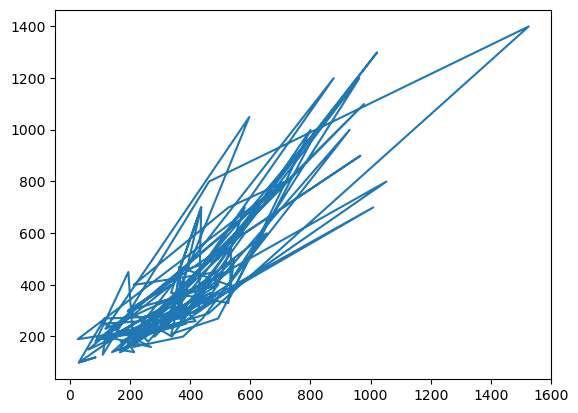

In [33]:
plt.plot(y_pred, y_test)

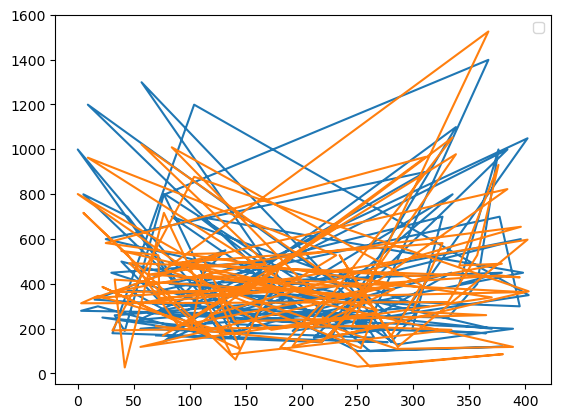

In [34]:
df2 = pd.DataFrame({"Y_test" : y_test , "Y_predict": y_pred})
plt.legend(["Actual" ,"Predicted"])
plt.plot(df2)